# Problem Set 3 Ec142
Quantile Regression: Computation/Illustration

SID#: 23539995
Name: David Jiwon Son

People who worked together: Michele Cimino

In [6]:

import numpy as np
import scipy.stats as scs
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math

col_dtypes = {"AgeInDays" : float, "YRSSCH" : int, "MONTHLY_EARNINGS" : int, "Father_NoSchool" : int, "Father_Incomplete1stPrimary" : int, "Father_Complete1stPrimary": float , "Father_Incomplete2ndPrimary": int, "Father_Complete2ndPrimary": int, "Father_IncompleteSecondary": int, "Father_CompleteSecondary": int, "Father_incompleteHigher": int, "Father_CompleteHigher": int, "Father_DontKnow": int, "Mother_NoSchool": int, "Mother_Incomplete1stPrimary": int, "Mother_Complete1stPrimary": int, "Mother_Incomplete2ndPrimary": int, "Mother_Complete2ndPrimary": int, "Mother_IncompleteSecondary": int, "Mother_CompleteSecondary": int, "MotherIncompleteHigher": int, "MotherCompleteHigher": int, "MotherDontKnow": int}

df = pd.read_csv("/Users/davidson/.spyder-py3/Brazil_1996PNAD.out.txt", dtype = col_dtypes, na_values="", engine="c", sep = "\t", encoding = "utf−8")

#drop the data where MONTHLY_EARNINGS data is missing
df = df.drop(df[df['MONTHLY_EARNINGS']==0].index)

df = df.reset_index()

Y = np.log(df["MONTHLY_EARNINGS"])

df["constant"] = 1
df["AgeInDaysSq"] = df["AgeInDays"] ** 2
X = df[["constant", "YRSSCH", "AgeInDays", "AgeInDaysSq"]]
ols = sm.OLS(Y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MONTHLY_EARNINGS   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.904e+04
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:10:11   Log-Likelihood:                -77088.
No. Observations:               66506   AIC:                         1.542e+05
Df Residuals:                   66502   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constant        2.8243      0.021    137.350      0.000       2.784       2.865
YRSSCH          0.1459      0.001    196.232      0.000       0.144       0.147
AgeInDays       0.0979      0.001     89.456      0.000       0.096       0.100
AgeInDaysSq    -0.0010   1.33e-05    -73.097      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1540.444   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3390.926
Skew:                           0.091   Prob(JB):                         0.00
Kurtosis:                       4.091   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
#B

#Create a dummy variable for each of the 16 possible schooling levels

included_YRSSCH = sorted (df['YRSSCH'].unique ())
pair_dums = pd.get_dummies(df['YRSSCH'].astype("category"), prefix="YRSSCH")

df = pd. concat ([ df , pair_dums ] , axis=1)
X= df[["AgeInDays", "AgeInDaysSq"]]
X= pd.concat([X, df.loc[:,"YRSSCH_" + str(included_YRSSCH[0]) : "YRSSCH_"+ str(included_YRSSCH[-1])]], axis=1)
ols1 = sm.OLS(Y,X).fit()
ols1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MONTHLY_EARNINGS   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3457.
Date:                Mon, 26 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:41:52   Log-Likelihood:                -76641.
No. Observations:               66506   AIC:                         1.533e+05
Df Residuals:                   66488   BIC:                         1.535e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AgeInDays       0.0963      0.001     87.474      0.000       0.094       0.098
AgeInDaysSq    -0.0010   1.33e-05    -72.803      0.000      -0.001      -0.001
YRSSCH_0        2.8800      0.022    129.255      0.000       2.836       2.924
YRSSCH_1        3.0687      0.026    117.541      0.000       3.017       3.120
YRSSCH_2        3.2048      0.024    133.614      0.000       3.158       3.252
YRSSCH_3        3.3333      0.023    145.056      0.000       3.288       3.378
YRSSCH_4        3.5327      0.022    158.665      0.000       3.489       3.576
YRSSCH_5        3.6145      0.022    161.958      0.000       3.571       3.658
YRSSCH_6        3.7022      0.023    158.184      0.000       3.656       3.748
YRSSCH_7        3.7607      0.023    160.201      0.000       3.715       3.807
YRSSCH_8        3.9456      0.023    170.713      0.000       3.900       3.991
YRSSCH_9        4.0238      0.031    131.075      0.000       3.964       4.084
YRSSCH_10       4.1311      0.029    144.271      0.000       4.075       4.187
YRSSCH_11       4.4317      0.024    182.351      0.000       4.384       4.479
YRSSCH_12       4.6758      0.043    107.940      0.000       4.591       4.761
YRSSCH_13       4.8242      0.044    110.478      0.000       4.739       4.910
YRSSCH_14       4.9098      0.042    116.473      0.000       4.827       4.992
YRSSCH_15       5.3132      0.026    204.323      0.000       5.262       5.364
==============================================================================
Omnibus:                     1665.913   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3826.433
Skew:                           0.090   Prob(JB):                         0.00
Kurtosis:                       4.161   Cond. No.                     5.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#C

#Plot the regressions in A and B on the same figure holding AgeInDays fixed at 40, but varying YRSSCH

df1 = df[df['AgeInDays']==40]
X1 = df1['YRSSCH']
Y1 = np.log(df1['MONTHLY_EARNINGS'])

#regression in [B] with fixed AgeInDays
X2= df1[["AgeInDays", "AgeInDaysSq"]]
X2= pd.concat([X2, df1.loc[:,"YRSSCH_" + str(included_YRSSCH[0]) : "YRSSCH_"+ str(included_YRSSCH[-1])]], axis=1)
ols2 = sm.OLS(Y1,X2).fit()
ols2.summary()

plt.scatter(X1,Y1)
#plot regression in [A] 
plt.plot(X1, ols.params[0]+X1*ols.params[1]+40*ols.params[2]+1600*ols.params[3])
#plot regression in [B]
plt.plot(X1, ols2.predict())

plt.show()

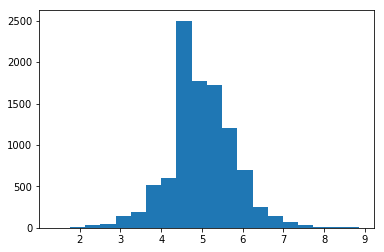

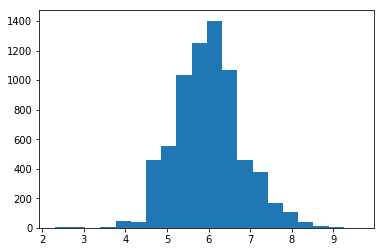

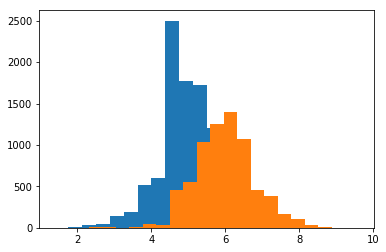

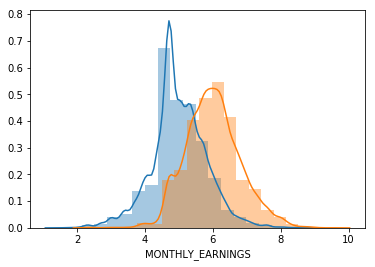

In [8]:
#D 
#Construct two histograms. One each for the distribution of the logarithm of the monthly earnings
#given YRSSCH= 0 and YRSSCH = 8. Comment on any differences.

X1 = df[df['YRSSCH']==0]
Y1 = np.log(X1["MONTHLY_EARNINGS"])
X2 = df[df['YRSSCH']==8]
Y2 = np.log(X2["MONTHLY_EARNINGS"])

plt.hist(Y1, 20)
plt.show()
plt.hist(Y2, 20)
plt.show()
#
plt.hist(Y1, 20)
plt.hist(Y2, 20)
plt.show()

sns.distplot(Y1,20) 
sns.distplot(Y2,20)
plt.show()


Comment
The two histograms show distributions of log earnings between two populations of no years of schooling versus 8 (or median) years of schooling. We can see the two groups seem to have similar spread, but the latter group has a higher mean monthly earnings.

In [ ]:
#E L=8 age ranges. K=16 number of distinct schooling values. For each of the 128 years of schooling and age combinagions
#with at least 30 observations in the datset estimate 10th, 25th, 50th, 75gh, and 90th quantiles of the distribution of.
#log earnings. For each conditional quantile construct a confidene interval using order statistics. 
#Using this CI construct a standard estimate.

df = df[df['AgeInDays']<=60]
df = df[df['AgeInDays']>=20]

# Use loop to construct the dummy variables.
for j in range(8):  #range(8)=[0,1,2,3,4,5,6,7]
    
    df['d%i' %j] = (df['AgeInDays']>=(20+5*j)) & (df['AgeInDays']<(20+5*(j+1)))
    
    if j==7:
        df['d%i' %j] = (df['AgeInDays']>=(20+5*j)) & (df['AgeInDays']<=(20+5*(j+1)))
        
    df['d%i' %j] = df['d%i' %j].astype(int)  

#Interaction Terms
for j in range(8): 
    for k in range(16):
        
        df ['int%i' %(j+1)*(k+1)] = df['d%i' %j] * df['YRSSCH_%i' %k]
        df ['int%i' %(j+1)*(k+1)] = df ['int%i' %(j+1)*(k+1)].astype(int)
for j in range(8):
    for k in range(16):
    
        if sum('int%i' %(j+1)*(k+1))>=30:
            df['int%i' %(j+1)*(k+1)] = df['int%i' %(j+1)*(k+1)]
        else:
            df.drop['int%i' %(j+1)*(k+1)]


            df['int%i'%(j+1)*(k+1)] = df['int%i' %(j+1)*(k+1)]


#(1-a)% CI for y_tau

quantile = [0.1,0.25,0.5,0.75,0.9]

for j in range(8):
    for k in range(16):
        dummy_list = ['int%i' %(j+1)*(k+1)]
        N = sum('int%i' %(j+1)*(k+1))

        for tau in quantile:
            j = math.floor(N*tau-1.96*(N*tau*(1-tau))**(1/2))

            k = math.ceil(N*tau-1.96*(N*tau*(1-tau))**(1/2))

#jth, kth order statistic

x_j = [] # Create an empty list. This will hold our results for the iterations.

for i in dummy_list:
    j = math.floor(N*tau-1.96*(N*tau*(1-tau))**(1/2))
    group = df[df[i]==1]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    x_j = x_j + [group.loc[j,'MONTHLY_EARNINGS']]

x_j = np.array(x_j)

x_k = []

for i in dummy_list:
    k = math.ceil(N*tau-1.96*(N*tau*(1-tau))**(1/2))
    group = df[df[i]==1]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    x_k = x_k + [group.loc[j,'MONTHLY_EARNINGS']]

x_k = np.array(x_k)

#Confidene Interval CI = [x_j, x_k], find jth and kth order statistic for each conditional qunatile
#Standard Error se = N**(1/2)*(x_k-x_j)/(2*1.96)

for j in range(8):
    for k in range(16):
        CI = [x_j, x_k]
        se = N**(1/2)*(x_k-x_j)/(2*1.96)

In [ ]:
#E Alternative Way
order = [] 
totalcount = []
age=[]
lower=[]
upper=[]
se=[]
school=[]

dummy_list2 = ['d%i' %j for j in range (8)]
dummy_list3 = ['YRSSCH_%i' %k for k in range (16)]

for i,j in itertools.product(dummy_list2,dummy_list3):
    k=0.9
    group = dta[(dta[i]==1)&(dta[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'MONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'MONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['MONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'MONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'MONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'MONTHLY_EARNINGS']-group.loc[a,'MONTHLY_EARNINGS'])/(2*1.96)]
        school = school + [int(j[1:])] 
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_90=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,"school":school,'count':totalcount})

for i,j in itertools.product(dummy_list2,dummy_list3):
    k=0.75
    group = dta[(dta[i]==1)&(dta[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'MONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'MONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['MONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'MONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'MONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'MONTHLY_EARNINGS']-group.loc[a,'MONTHLY_EARNINGS'])/(2*1.96)]
        school = school + [int(j[1:])] 
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_75=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,"school":school,'count':totalcount})

for i,j in itertools.product(dummy_list2,dummy_list3):
    k=0.5
    group = dta[(dta[i]==1)&(dta[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'MONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'MONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['MONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'MONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'MONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'MONTHLY_EARNINGS']-group.loc[a,'MONTHLY_EARNINGS'])/(2*1.96)]
        school = school + [int(j[1:])] 
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_50=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,"school":school,'count':totalcount})

for i,j in itertools.product(dummy_list2,dummy_list3):
    k=0.25
    group = dta[(dta[i]==1)&(dta[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'MONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'MONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['MONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'MONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'MONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'MONTHLY_EARNINGS']-group.loc[a,'MONTHLY_EARNINGS'])/(2*1.96)]
        school = school + [int(j[1:])] 
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_25=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,"school":school,'count':totalcount})

for i,j in itertools.product(dummy_list2,dummy_list3):
    k=0.1
    group = dta[(dta[i]==1)&(dta[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()
    h=int(i[1:])
    if count>=30:
        order = order + [(group.loc[math.floor(k*(count+1)),'MONTHLY_EARNINGS']+group.loc[math.ceil(k*(count+1)),'MONTHLY_EARNINGS'])/2]
        totalcount = totalcount + [group['MONTHLY_EARNINGS'].count()]
        age = age + [(20+5*h+20+5*(h+1))/2] 
        a=max(math.floor(count*k-math.sqrt(count*k*(1-k))*1.96)-1,0)
        b=min(math.ceil(count*k+math.sqrt(count*k*(1-k))*1.96)-1,count-1)
        lower = lower + [group.loc[a,'MONTHLY_EARNINGS']]
        upper = upper + [group.loc[b,'MONTHLY_EARNINGS']]
        se=se + [math.sqrt(count)*(group.loc[b,'MONTHLY_EARNINGS']-group.loc[a,'MONTHLY_EARNINGS'])/(2*1.96)]
        school = school + [int(j[1:])] 
order = np.array(order) 
age = np.array(age)
agesq=[a*a for a in age]
df_10=pd.DataFrame({'logearnings':order,'se':se,'lower':lower,'upper':upper,'age':age,'agesq':agesq,"school":school,'count':totalcount})

In [ ]:
#F Inspect standard error estimates. Inspect the distribution of MONTHLY_EARNINGS. Is MONTHLY_EARNINGS a continuously-
#valued random variable? Relate what you find to the phenomena of standard error estimates of zero.

sns.distplot(df['MONTHLY_EARNINGS'])


There are some standard error estimates of zero. MONTHLY_EARNINGS is not a continuously valued random variable. The phenomena of standard error estimates of zero indicate that the j and k are equal. Since MONTHLY_EARNINGS is not a continuously valued random variable, we cannot include such variables that have standard error estimates of zero in our analysis.

In [ ]:
#G Assume that, for the five estimated quantiles, the conditional quantile function of the logarithm of monthly earnings
#given schooling and age is a linear function of YRSSCH, AgeInDays, and AgeInDays squared. Estimate the parameters indexing
#each of the five conditional qunatile functions by min distance.

#Eliminate zero se
df_10=df_10[df_10["se"]!=0]
df_25=df_25[df_25["se"]!=0]
df_50=df_50[df_50["se"]!=0]
df_75=df_75[df_75["se"]!=0]
df_90=df_90[df_90["se"]!=0]

#defining terms for quantile regression
sum =df_10["count"].sum()
X_10=df_10[["age","agesq","school"]]
Y_10=df_10["logearnings"]
w_10=[(a/(len(df)*(b**2)) for a,b in zip(df_10["count"],df_10["se"]))]

#quantile regression
wls_10=sm.WLS(Y_10,X_10, weights=w_10).fit()
wls_10.summary()

#defining terms for quantile regression
sum =df_25["count"].sum()
X_25=df_25[["age","agesq","school"]]
Y_25=df_25["logearnings"]
w_25=[(a/(len(df)*(b**2)) for a,b in zip(df_25["count"],df_25["se"]))]

#quantile regression
wls_25=sm.WLS(Y_25,X_25, weights=w_25).fit()
wls_25.summary()

#defining terms for quantile regression
sum =df_50["count"].sum()
X_50=df_50[["age","agesq","school"]]
Y_50=df_50["logearnings"]
w_50=[(a/(len(df)*(b**2)) for a,b in zip(df_50["count"],df_50["se"]))]

#quantile regression
wls_50=sm.WLS(Y_50,X_50, weights=w_50).fit()
wls_50.summary()

#defining terms for quantile regression
sum =df_75["count"].sum()
X_75=df_75[["age","agesq","school"]]
Y_75=df_75["logearnings"]
w_75=[(a/(len(df)*(b**2)) for a,b in zip(df_75["count"],df_75["se"]))]

#quantile regression
wls_75=sm.WLS(Y_75,X_75, weights=w_75).fit()
wls_75.summary()

#defining terms for quantile regression
sum =df_90["count"].sum()
X_90=df_90[["age","agesq","school"]]
Y_90=df_90["logearnings"]
w_90=[(a/(len(df)*(b**2)) for a,b in zip(df_90["count"],df_90["se"]))]

#quantile regression
wls_90=sm.WLS(Y_90,X_90, weights=w_90).fit()
wls_90.summary()

[H] How do earnings vary with education in Brazil?

The findings show that returns to schooling within age and education groups differ across the wage distirbution. Whenever returns to schooling for different quantiles are different, wage earners in the highest qunatile receive the highest returns. In other words, whenever the difference is statistically different, the returns to schooling for workers in the 90th quantile consistently exceeds the returns to workers in the 75th quantile which in turn eceeds the returns for the 50th quantile and so on. The large gap between each quantile implies that schooling is not uniformly rewarded in the labor market.

If we fix age and look at the with varying years of schooling, as we did in [c], we see there is a positive relationship between log earnings and years of schooling, consistent with the results in the paper showing positive
impact of education on earnings, which is of our interest.

10th, 25th, 50th, 75th, and 90th quantiles of distribution that we chose for analysis indicate that we know how much education impacts earnings (controlling for different age groups) in different wage earning groups instead of on average. By doing so, we would be able to compare the different magnitudes of impact that education has on earnings among high-level, mid-level, or low-level wage earning groups. This enables a more minute research wherein we can analyze returns to schooling on a componentwise level.


In [ ]:
#I Repeat Analysis in part [g] for all "centiles" 5,6,7,..,94,95. Plot "centile" on the x-axis and the corresponding
#coefficient on schooling on the y-axis. Also plot the corresponding point-wise 95 percent confidence band.

for i,j in itertools.product(dummy_list2,dummy_list3):
   for k in range (5,96):
    group = df[(df[i]==1)&(df[j]==1)]
    group = group.sort_values('MONTHLY_EARNINGS')
    group = group.reset_index()
    count = group['MONTHLY_EARNINGS'].count()